In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train, X_test = X_train / 255.0, X_test / 255.0



In [3]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [4]:
model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test, y_test, verbose=2)

Epoch 1/5
  78/1875 [>.............................] - ETA: 1s - loss: 1.0932 - acc: 0.6807  

2022-07-21 00:21:44.362132: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 614us/step - loss: 0.3025 - acc: 0.9120
Epoch 2/5
1875/1875 [==============================] - 1s 635us/step - loss: 0.1461 - acc: 0.9559
Epoch 3/5
1875/1875 [==============================] - 1s 604us/step - loss: 0.1081 - acc: 0.9670
Epoch 4/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.0884 - acc: 0.9729
Epoch 5/5
1875/1875 [==============================] - 1s 638us/step - loss: 0.0762 - acc: 0.9763
313/313 - 0s - loss: 0.0761 - acc: 0.9781 - 158ms/epoch - 505us/step


[0.07611805945634842, 0.9781000018119812]

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2.7.0


In [6]:
train_img.shape
print(train_img.shape)

len(train_labels)

test_img.shape

(60000, 28, 28)


(10000, 28, 28)

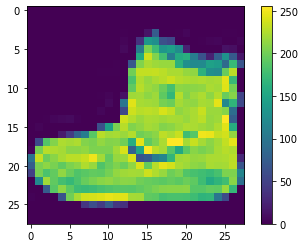

In [7]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

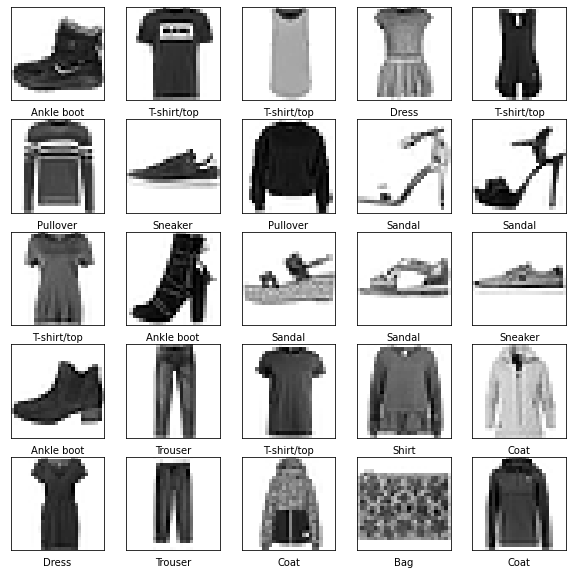

In [8]:
train_img = train_img / 255.0
test_img = test_img / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5 ,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [9]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10)
])
model.compile(optimizer='adam',  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])


In [10]:
model.fit(train_img, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 620us/step - loss: 0.4945 - acc: 0.8270
Epoch 2/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.3715 - acc: 0.8648
Epoch 3/10
1875/1875 [==============================] - 1s 611us/step - loss: 0.3377 - acc: 0.8772
Epoch 4/10
1875/1875 [==============================] - 1s 616us/step - loss: 0.3126 - acc: 0.8853
Epoch 5/10
1875/1875 [==============================] - 1s 628us/step - loss: 0.2943 - acc: 0.8922
Epoch 6/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.2797 - acc: 0.8963
Epoch 7/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.2666 - acc: 0.9014
Epoch 8/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.2562 - acc: 0.9041
Epoch 9/10
1875/1875 [==============================] - 1s 601us/step - loss: 0.2438 - acc: 0.9090
Epoch 10/10
1875/1875 [==============================] - 1s 638us/step - loss: 0.2356 - acc: 0.9118


In [11]:
test_loss, test_acc= model.evaluate(test_img, test_labels, verbose=2)
print(test_acc)

313/313 - 0s - loss: 0.3286 - acc: 0.8864 - 163ms/epoch - 520us/step
0.8863999843597412


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predict = probability_model.predict(test_img)

predict[0]

t = np.argmax(predict[0])
print(t)

print('label', test_labels[0])

9
label 9


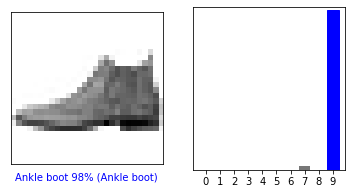

In [13]:
def plot_images(i, prediction_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(prediction_array), class_names[predicted_label]), color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predict[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predict[i], test_labels)
plt.show()
    

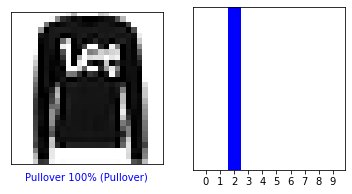

In [14]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predict[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predict[i], test_labels)
plt.show()


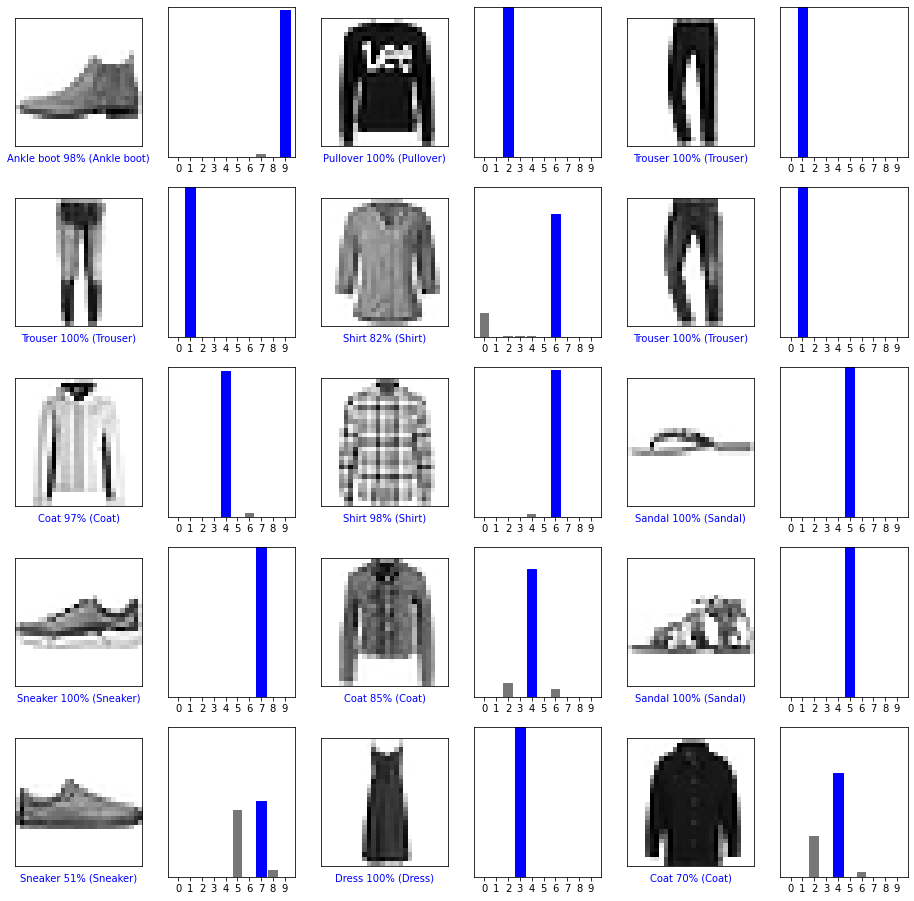

In [15]:
plt.figure(figsize=(16,16))
for i in range(15):
    plt.subplot(5,6,2* i+ 1)
    plot_images(i, predict[i], test_labels, test_img)
    plt.subplot(5,6,2* i+ 2)
    plot_value_array(i, predict[i], test_labels)


(1, 28, 28)
[[2.40769964e-06 1.33372115e-11 1.34790710e-07 2.48330956e-09
  3.25192929e-07 7.84609409e-04 1.69939710e-06 2.21112426e-02
  5.26008080e-07 9.77099001e-01]]


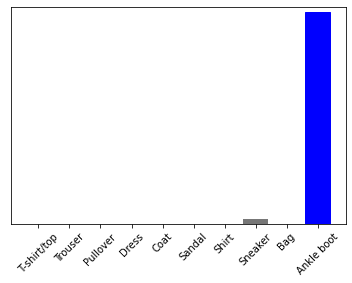

In [16]:
i = 0
img = test_img[i]
img = (np.expand_dims(img, 0))
print(img.shape)

prediction_single = probability_model.predict(img)
print(prediction_single)
plot_value_array(i, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [17]:
np.argmax(prediction_single[0])

9